In [292]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import seaborn as sns
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [293]:
# df = pd.read_csv('C:\\Users\\Staro\\Documents\\GitHub\\DSC180A_Q1\\data\\out\\features_1635893205797444700.csv', index_col='group')
# df = pd.read_csv('C:\\Users\\Staro\\Documents\\GitHub\\DSC180A_Q1\\data\\out\\features_1636252967.csv', index_col='group')
df = pd.read_csv('C:\\Users\\Staro\\Documents\\GitHub\\DSC180A_Q1\\data\\out\\features_1636264373.csv', index_col='group')
df

,1->2Bytes_min,1->2Bytes_max,1->2Bytes_mean,1->2Bytes_median,1->2Bytes_var,2->1Bytes_min,2->1Bytes_max,2->1Bytes_mean,2->1Bytes_median,2->1Bytes_var,...,2->1Pkts_rolling_2s_mean_max,2->1Pkts_rolling_2s_mean_var,1->2Pkts_rolling_3s_mean_min,1->2Pkts_rolling_3s_mean_max,1->2Pkts_rolling_3s_mean_var,2->1Pkts_rolling_3s_mean_min,2->1Pkts_rolling_3s_mean_max,2->1Pkts_rolling_3s_mean_var,label_latency,label_packet_loss
group,,,,,,,,,,,,,,,,,,,,,
163432047,917192,1272556,1116219.2,1121978,1.476496e+10,10764,18096,15277.6,15392,5.806870e+06,...,345.0,1148.187500,362.666667,419.333333,481.079365,255.333333,325.333333,811.220238,200,5000
163432048,830408,1265160,1107732.4,1153110,1.971293e+10,9804,17940,15086.4,15912,6.111869e+06,...,333.5,1088.877778,359.333333,424.333333,446.445679,255.333333,329.333333,608.350617,200,5000
163432049,873804,1375788,1128580.0,1100770,2.464751e+10,11796,19084,15053.2,15002,5.921085e+06,...,324.0,1083.302778,347.333333,437.333333,679.303704,236.666667,332.000000,793.359259,200,5000
163432050,920140,1315328,1112159.6,1125880,1.553533e+10,12272,20124,15920.4,16582,6.704485e+06,...,353.5,1743.344444,361.333333,425.000000,502.711111,261.000000,340.333333,953.887654,200,5000
163432051,925628,1260764,1135976.0,1143542,1.118544e+10,13000,18876,15998.0,16380,4.220556e+06,...,350.5,1351.211111,362.000000,422.000000,430.464198,255.333333,351.000000,1015.655556,200,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163519060,1100124,3385656,2571689.2,2584186,3.920305e+11,17860,49712,38248.0,39468,8.835790e+07,...,860.0,16917.736111,684.333333,1073.000000,19155.283951,552.333333,833.333333,11713.729630,200,50000
163519061,2746308,4104428,3311305.6,3186562,1.894620e+11,44304,59956,49967.6,47476,3.574606e+07,...,1146.0,8775.677778,986.666667,1231.000000,5825.981481,797.666667,1063.000000,7008.524691,200,50000
163519062,1964548,4181140,3293034.4,3116404,4.041792e+11,31304,61620,49554.4,48614,8.750072e+07,...,1015.5,10100.955556,919.000000,1263.333333,10918.717284,743.333333,1041.666667,7275.525926,200,50000


In [294]:
# df.index.value_counts()
df.columns

Index(['1->2Bytes_min', '1->2Bytes_max', '1->2Bytes_mean', '1->2Bytes_median',
       '1->2Bytes_var', '2->1Bytes_min', '2->1Bytes_max', '2->1Bytes_mean',
       '2->1Bytes_median', '2->1Bytes_var', '1->2Pkts_min', '1->2Pkts_max',
       '1->2Pkts_mean', '1->2Pkts_median', '1->2Pkts_var', '2->1Pkts_min',
       '2->1Pkts_max', '2->1Pkts_mean', '2->1Pkts_median', '2->1Pkts_var',
       'mean_tdelta_min', 'mean_tdelta_max', 'mean_tdelta_mean',
       'mean_tdelta_var', 'max_tdelta_max', 'max_tdelta_mean',
       'max_tdelta_var', '1->2Pkts_rolling_2s_mean_min',
       '1->2Pkts_rolling_2s_mean_max', '1->2Pkts_rolling_2s_mean_var',
       '2->1Pkts_rolling_2s_mean_min', '2->1Pkts_rolling_2s_mean_max',
       '2->1Pkts_rolling_2s_mean_var', '1->2Pkts_rolling_3s_mean_min',
       '1->2Pkts_rolling_3s_mean_max', '1->2Pkts_rolling_3s_mean_var',
       '2->1Pkts_rolling_3s_mean_min', '2->1Pkts_rolling_3s_mean_max',
       '2->1Pkts_rolling_3s_mean_var', 'label_latency', 'label_packet_loss'],
 

In [295]:
df['label_packet_loss'].unique()

array([ 5000, 10000,   500,  7500,   750,   200,   400,   600,   800,
        1000,  1200,  2000,  1600,  1400,  1800,  2500,  3400,  3000,
        3500,  5500,  4000,  4500,  6000,  7000,  6500,  8500,  9000,
        8000, 10500, 11000,  9500, 12000, 12500, 11500, 13000, 13500,
       14000, 15000, 15500, 14500, 16000, 17000, 16500, 18000, 17500,
         100, 50000], dtype=int64)

In [296]:
# X = df
cols = [x for x in df.columns if not 'label' in x]
X = df[cols].fillna(0)
# y = 1.0 / df['label_packet_loss']
y = np.log(df['label_packet_loss'])
# y = df['label_packet_loss']
y.describe()

count    2198.000000
mean        8.417681
std         1.272790
min         4.605170
25%         7.495542
50%         8.853665
75%         9.433484
max        10.819778
Name: label_packet_loss, dtype: float64

In [297]:
X_train, X_test, y_train, y_test = train_test_split(df[cols].fillna(0), 1/df['label_packet_loss'], train_size=0.7, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1538, 39), (660, 39), (1538,), (660,))

In [298]:
lm = LinearRegression()
rd = Ridge(normalize=True, alpha=0.05)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_jobs=-1)

lm.fit(X_train, y_train)
rd.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

untransformed = [lm.score(X_test, y_test), rd.score(X_test, y_test), dt.score(X_test, y_test), rf.score(X_test, y_test)]
untransformed

[0.9789683693272804,
 0.9784993247849505,
 0.9988331160521922,
 0.9940164627295743]

In [299]:
lm.get_params(), lm.score(X_train, y_train)

({'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': False,
  'positive': False},
 0.9741835224702223)

<AxesSubplot:ylabel='Frequency'>

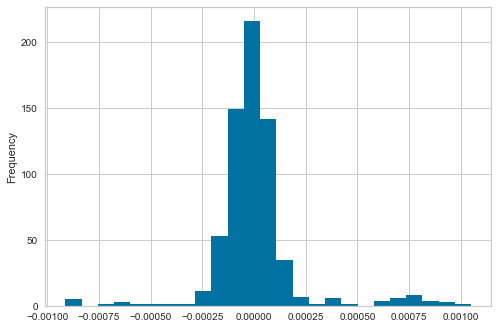

In [300]:
# lm.predict(X_test)
pd.Series(lm.predict(X_test) - y_test).reset_index(drop=True).plot.hist(bins=25)

In [301]:
X_train, X_test, y_train, y_test = train_test_split(df[cols].fillna(0), np.log(df['label_packet_loss']), train_size=0.7, shuffle=True, random_state=42)

In [302]:
lm2 = LinearRegression()
rd2 = Ridge(normalize=True, alpha=0.25)
dt2 = DecisionTreeRegressor()
rf2 = RandomForestRegressor(n_jobs=-1)

lm2.fit(X_train, y_train)
rd2.fit(X_train, y_train)
dt2.fit(X_train, y_train)
rf2.fit(X_train, y_train)

logged = [lm2.score(X_test, y_test), rd2.score(X_test, y_test), dt2.score(X_test, y_test), rf2.score(X_test, y_test)]
logged

[0.9457491348655405,
 0.9326461698851777,
 0.9661837818309079,
 0.9823826049621134]

# --prototyping below--

In [303]:
pd.DataFrame({"Pure Labels":untransformed,
"Inverted Log Labels":logged}, 
index=['Linear','Ridge','Decision Tree', 'Random Forest'])

,Pure Labels,Inverted Log Labels
Linear,0.978968,0.945749
Ridge,0.978499,0.932646
Decision Tree,0.998833,0.966184
Random Forest,0.994016,0.982383


In [304]:
temp = [10**x for x in range(6)]
[np.log(x) for x in temp]

[0.0,
 2.302585092994046,
 4.605170185988092,
 6.907755278982137,
 9.210340371976184,
 11.512925464970229]

0.9816313920489586

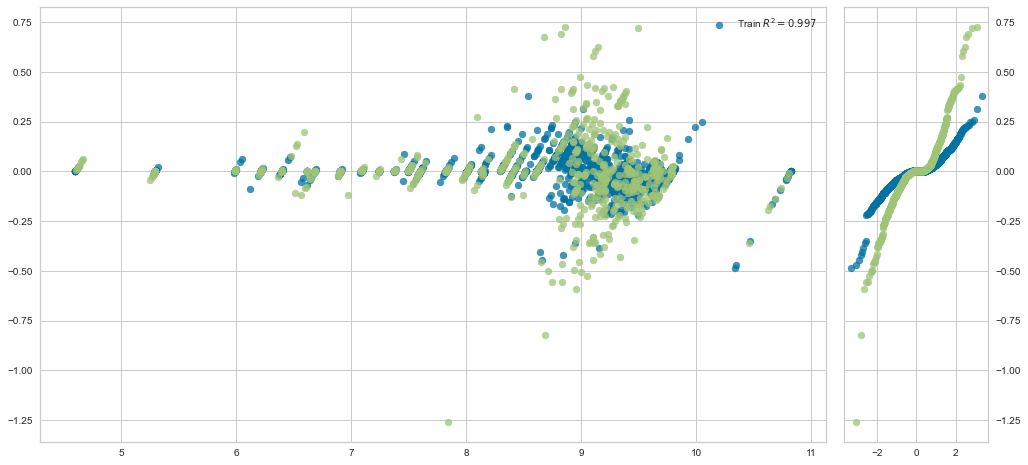

In [305]:
plt.figure(figsize=(17, 8))
rf3 = RandomForestRegressor(n_jobs=-1)
# rd3 = Ridge(normalize=True, alpha=0.23)
rd4 = RidgeCV(normalize=True, alphas=np.arange(0.01, 0.25, 0.01).round(2))
lm3 = LinearRegression()
viz = ResidualsPlot(rf3, hist=False, qqplot=True)
viz.fit(X_train, y_train)
# viz.score(X_train, y_train)
plt.legend()
viz.score(X_test, y_test)

In [306]:
rd4.alpha_

AttributeError: 'RidgeCV' object has no attribute 'alpha_'

In [ ]:
pd.DataFrame({"predicted":np.exp(viz.predict(X_test)), "actual":np.exp(y_test)})

,predicted,actual
group,,
163607134,971.371656,1000.0
163613808,8086.445624,8500.0
163607125,1034.782205,800.0
163615765,9212.337824,13000.0
163607065,1094.602929,1200.0
...,...,...
163607350,1810.607376,1800.0
163615743,12033.859526,14000.0
163607059,960.800493,800.0


In [ ]:
np.exp(viz.predict(X_test))

array([  988.90483291,  7832.86850262,   800.        , 11486.3520336 ,
        1200.        , 14846.40221336,  6659.01787657,  4281.0303935 ,
        2532.11074341,   797.70185069, 10671.71467231,  7706.68974316,
       17818.37524907,  7826.6162881 ,   571.5053487 ,  3457.10285824,
        9101.17829059,  1000.        ,   103.52649238,  1207.42209153,
        9471.64476997,  2000.        ,  1400.        ,  7770.66218787,
         661.38533594, 15285.57990775,  1811.64001568,  8206.50233051,
       10471.29063028,  8957.89453304, 16094.95326623,  1600.        ,
       12195.80845496,  5481.63908868, 17600.43395778, 18031.80255039,
        1003.65308745,  2926.65747106, 48463.45702101,  4033.11557826,
        4499.92770582,  1800.        ,  7302.06132536,   400.89357081,
        9192.93364506, 15820.35338128, 11651.32182294, 13258.8219861 ,
       10959.86023341,   748.32828922,   400.        , 17605.39285283,
       11434.84177431,  1403.52282683,  1807.60196481, 10489.2536034 ,
      

In [ ]:
dt.score(X_test, y_test)

0.995732450492469

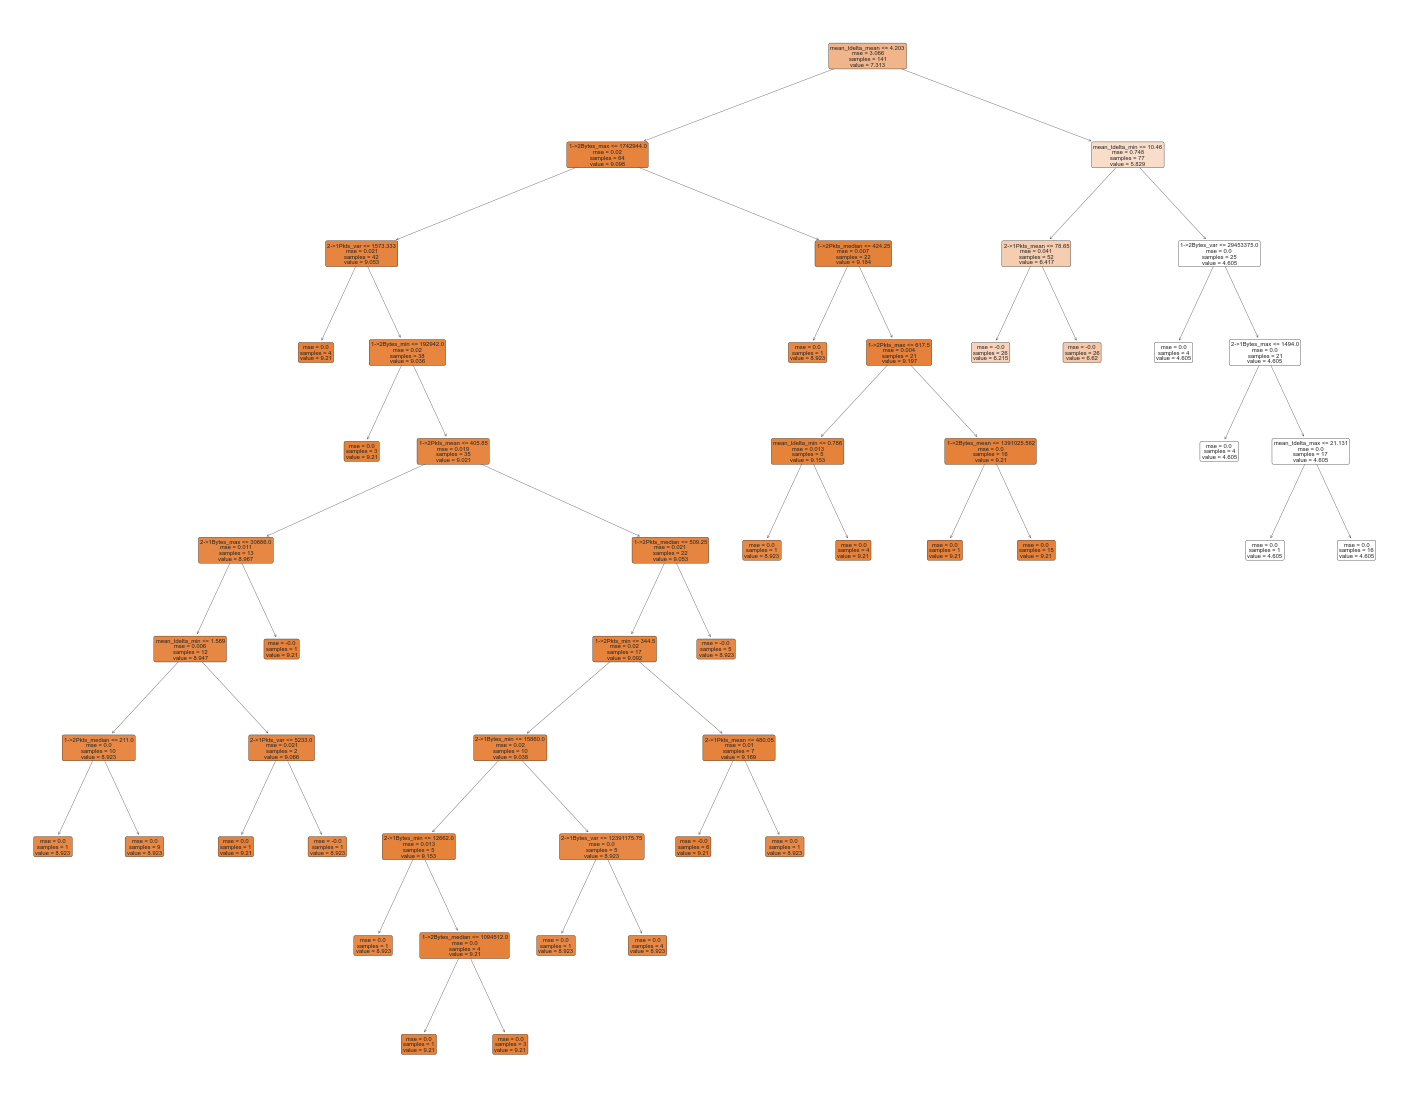

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(dt3, feature_names=cols, 
          filled=True, impurity=True, 
          rounded=True);

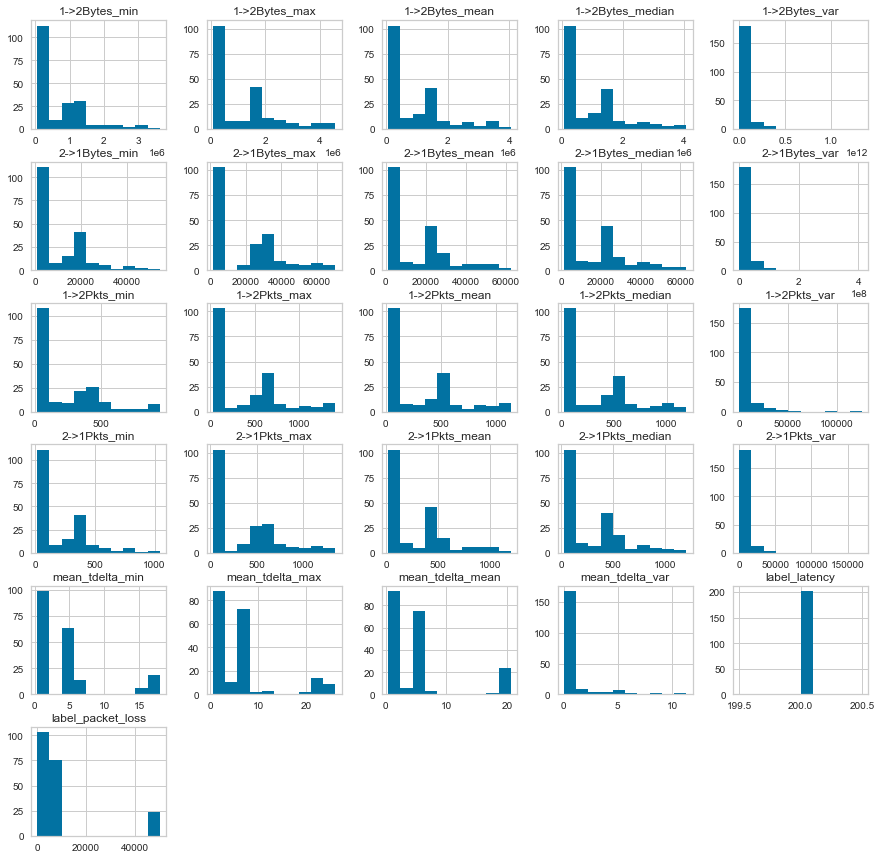

In [ ]:
df.hist(figsize=(15, 15));

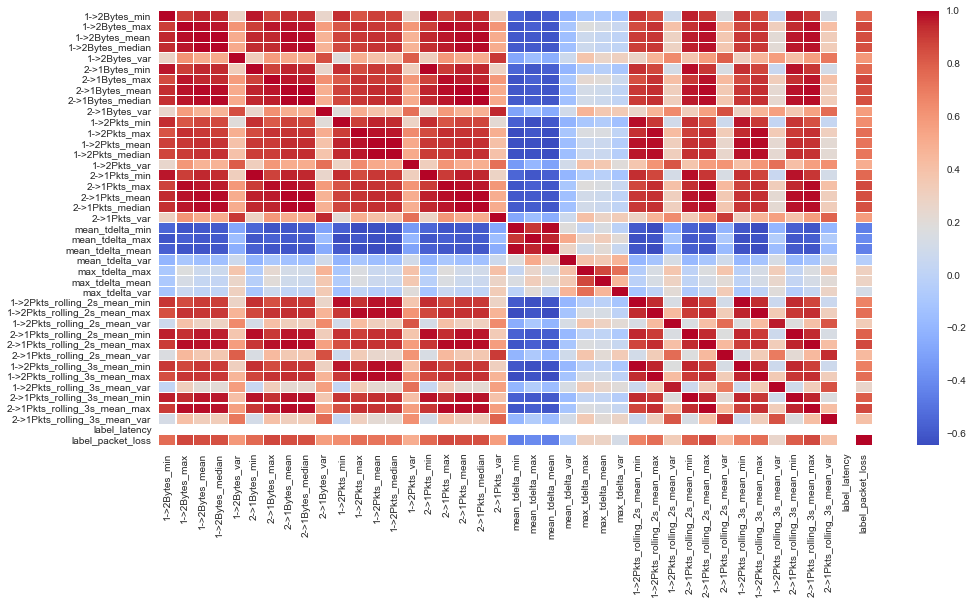

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="coolwarm",linewidths=.05);

In [ ]:
X_test

,1->2Bytes_min,1->2Bytes_max,1->2Bytes_mean,1->2Bytes_median,1->2Bytes_var,2->1Bytes_min,2->1Bytes_max,2->1Bytes_mean,2->1Bytes_median,2->1Bytes_var,...,1->2Pkts_var,2->1Pkts_min,2->1Pkts_max,2->1Pkts_mean,2->1Pkts_median,2->1Pkts_var,mean_tdelta_min,mean_tdelta_max,mean_tdelta_mean,mean_tdelta_var
group,,,,,,,,,,,,,,,,,,,,,
163519050,193588,256580,226893.6,229480,3.795239e+08,3036,4088,3655.2,3716,1.370908e+05,...,32.711111,57,77,68.4,68.5,45.377778,5.809211,7.539062,6.489741,0.366060
163519051,179108,271320,225952.8,218980,1.046524e+09,2964,4788,4022.8,4104,3.654224e+05,...,93.111111,57,85,74.2,74.5,87.066667,5.359551,7.528455,6.254649,0.489826
163519052,190536,264080,228528.0,224152,5.259657e+08,3348,4632,3826.0,3790,1.462231e+05,...,41.600000,60,87,71.5,69.5,63.611111,5.333333,7.244275,6.288106,0.329191
163519053,184432,259528,229681.2,229480,4.811469e+08,3236,4416,3833.2,3770,1.541442e+05,...,54.011111,59,81,71.8,72.5,52.177778,5.594118,7.887097,6.391334,0.464862
163519054,175796,286060,227054.0,217558,1.318559e+09,2912,4628,3765.6,3692,3.864540e+05,...,143.433333,56,89,70.5,69.0,140.277778,5.278075,7.674797,6.496164,0.837640
163519055,183192,271372,227328.0,232454,6.287152e+08,3168,4524,3676.0,3680,2.013298e+05,...,61.377778,57,87,69.1,68.0,95.877778,5.337017,7.453846,6.473532,0.538698
163519056,187432,265424,229546.8,225808,6.590675e+08,3120,4016,3648.0,3676,9.873778e+04,...,72.055556,59,76,68.4,69.0,35.377778,5.586420,7.888889,6.453698,0.503727
163519057,182932,274268,230276.0,232970,8.454402e+08,3108,4472,3766.0,3692,2.145609e+05,...,78.488889,57,86,70.6,69.0,88.488889,5.288889,8.049587,6.466280,0.637477
163519058,181692,278716,230141.6,224360,1.022851e+09,2808,4576,3818.4,3770,3.549092e+05,...,113.955556,54,88,71.4,72.5,113.155556,5.141304,7.768595,6.307047,0.672038


In [ ]:
y_test

group
163519050    0.00200
163519051    0.00200
163519052    0.00200
163519053    0.00200
163519054    0.00200
163519055    0.00200
163519056    0.00200
163519057    0.00200
163519058    0.00200
163519059    0.00200
163519060    0.00200
163519061    0.00200
163519062    0.00200
163519063    0.00200
163519064    0.00200
163519065    0.00200
163519066    0.00200
163519041    0.00002
163519042    0.00002
163519043    0.00002
163519044    0.00002
163519045    0.00002
163519046    0.00002
163519047    0.00002
163519048    0.00002
163519049    0.00002
163519050    0.00002
163519051    0.00002
163519052    0.00002
163519053    0.00002
163519054    0.00002
163519055    0.00002
163519056    0.00002
163519057    0.00002
163519058    0.00002
163519059    0.00002
163519060    0.00002
163519061    0.00002
163519062    0.00002
163519063    0.00002
163519064    0.00002
Name: label_packet_loss, dtype: float64